In [1]:
import pandas as pd
import networkx as nx
import pickle

In [2]:
user_graph = nx.read_gpickle("../graphs/user_network.gpickle")
reviews_df = pd.read_json("../yelp/yelp_academic_dataset_review.json", lines=True)
tips_df = pd.read_json("../yelp/yelp_academic_dataset_tip.json", lines=True)
df_2018 = pd.read_csv("../datasets/2017-2018_restaurants.csv")

reviews_df = reviews_df[reviews_df["business_id"].isin(df_2018["business_id"])]
tips_df = tips_df[tips_df["business_id"].isin(df_2018["business_id"])]

tips_df.drop(columns="compliment_count", inplace=True)
reviews_df.drop(columns=["useful", "funny", "cool", "review_id"], inplace=True)

complete_df = pd.concat([reviews_df, tips_df])

In [10]:
import datetime
ranged_df = complete_df[(complete_df["date"] >= datetime.datetime(2017, 1, 1, 0, 0)) & (complete_df["date"] <= datetime.datetime(2018, 12, 31, 23, 59))]

In [12]:
ranged_df.sort_values(by=['date'], inplace=True, ascending=True)

<ipython-input-12-30b11d4a087d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranged_df.sort_values(by=['date'], inplace=True, ascending=True)


In [14]:
user_per_business = ranged_df.groupby("business_id").agg(user_ids=("user_id", lambda x: x.tolist()))

In [17]:
user_per_business.to_csv("../datasets/2017-2018_visited_users.csv")

In [18]:
from itertools import chain
all_users = list(set(chain(*user_per_business["user_ids"].tolist())))

In [20]:
subgraph_2017 = user_graph.subgraph(all_users).copy()

len(subgraph_2017.nodes), len(subgraph_2017.edges)

(579604, 1560849)

In [22]:
nx.write_gpickle(subgraph_2017, "../graphs/2017-2018_user_network.gpickle")

## Analysis

In [48]:
f"average degree: {len(subgraph_2017.edges) * 2 / len(subgraph_2017.nodes)}"

'average degree: 5.385915211075148'

In [49]:
nx.average_clustering(subgraph_2017)

0.044835192106719005

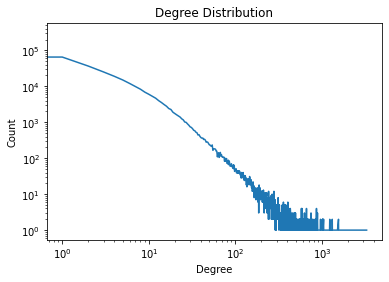

In [50]:
import collections
import matplotlib.pyplot as plt
degree_sequence = sorted([d for n, d in subgraph_2017.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.loglog(deg, cnt)

plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")

plt.show()

In [56]:
degreeCount[0] / sum(degreeCount.values())

0.543890311316002